# POKEMON INSIGHT

wisnu.theofilus@gmail.com

This notebook I made to train my data analyst skill. I get this dataset from **kaggle.com** that was made based on popular video games. I took this dataset because I am familiar with the video games so I thought it easier for me to get some insight out of it.

Pokemon is a video game that has a jrpg genre. That means this video game focuses on adventure, leveling, and turn-based fighting style. In this type of game, player technique skill wasn't important, however decision making should be the most important skill for a player. That is why this kind of game is suitable to be analyzed closely. 

This dataset contains a list of all pokemon that have been introduced in the game until 2017, players of the game usually call this dataset as **POKEDEX**. Apart the name of the pokemon, this dataset also include:
- Type of the pokemon
- Attribute (ATTACK, DEFENSE, etc.)
- Generation of the pokemon when it's introduced
- Is it legendary pokemon or not

The objective of this insight to find out :
- The distribution of pokemon type
- The distribution of legendary pokemon
- The difference of some attribute between type

**Lets get started**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

%matplotlib inline

This is the dataset that will be analyzed, we will called the dataset as `df_st`. From the data, we could know that it contain 800 different pokemon.

In [2]:
df_st = pd.read_csv('./Pokemon_stats.csv')
df_st

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Before we begin to analyze, it's better to clean up the data. All things that should be clean up is:
- Make all columns uppercase
- Delete repeated name that have Mega in front of it
- Set `NAME` as an index
- Drop unnecessary column

> First, we will make all columns **UPPERCASE**

In [3]:
df_st.columns = df_st.columns.str.upper().str.replace('_', '')
df_st.head()

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


> Then, we need to delete all repeated name that have Mega in front of it

In [4]:
df_st['NAME'] = df_st['NAME'].str.replace(".*(?=Mega)", "")
df_st.head(10)

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


> After that, we will set `NAME` as an index

In [5]:
df_st = df_st.set_index('NAME')
df_st.head()

,#,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False


> Lastly, we will drop unnecessary columns. The columns that need to be removed is `#` column because it only contain serial number of the pokemon and have repeated number for Mega pokemon

In [6]:
df_st=df_st.drop(['#'],axis=1)
df_st.head()

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


After the data have been clean up, we could start analyzing it. 

## POKEMON TYPE DISTRIBUTION

First of all, we should see the correlation between every columns in the data, if the data of those two columns linear, it means the data will be higher.

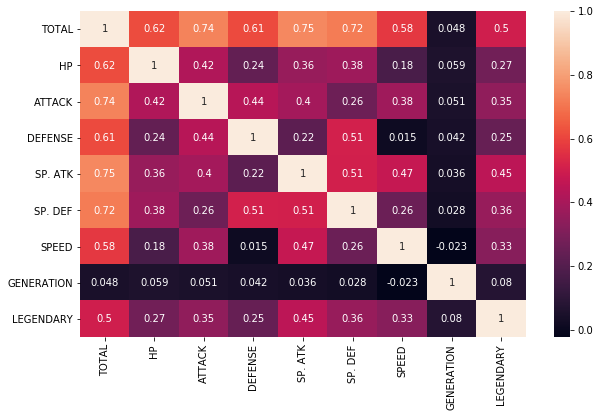

In [7]:
plt.figure(figsize=(10,6)) #manage the size of the plot
sns.heatmap(df_st.corr(),annot=True) #df_st.corr() makes a correlation matrix and sns.heatmap is used to show the correlations heatmap
plt.show()

Apart from the correlation with the column itself, there is no columns that has a correlation above 0.9, the highest is 0.75. So we can conclude that the columns in this dataset do not have a significant correlation.

There are two `TYPE` in this dataset, that is `TYPE 1` and `TYPE 2`. `TYPE 1` are the base type of the pokemon, in the game, usually pokemon distribution in certain area have the sampe type as the `TYPE 1`. However, `TYPE 2` usually used to increase the complexity of the game, so one pokemon have ability from different type. 

For answering the first question:

> How is the distribution of pokemon types?

We could start by saw the total pokemon in each type.

This is the distribution of `TYPE 1` :

In [8]:
df_st['TYPE 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ghost        32
Ground       32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: TYPE 1, dtype: int64

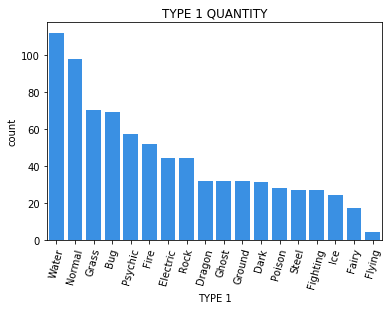

In [9]:
chart = sns.countplot(x = 'TYPE 1', 
                      data = df_st,
                      color = 'dodgerblue',
                      order = df_st['TYPE 1'].value_counts().index)

chart.set_title('TYPE 1 QUANTITY')

chart.set_xticklabels(chart.get_xticklabels(), 
                      rotation=75,)
fig = chart.get_figure()
fig.savefig("TYPE 1 QUANTITY.png", bbox_inches = "tight")

From the data above, we could conclude:

> - **Water** is the type with the **highest** number of `TYPE 1` pokemon
> - **Flying** is the type with the **lowest** number of `TYPE 1` pokemon

Then, this is the distribution of `TYPE 2` pokemon :

In [10]:
df_st['TYPE 2'].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Ghost       14
Water       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: TYPE 2, dtype: int64

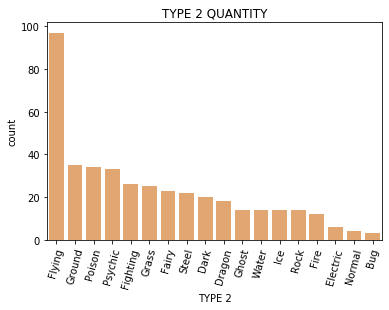

In [11]:
chart = sns.countplot(x = 'TYPE 2', 
                      data = df_st,
                      color = 'sandybrown',
                      order = df_st['TYPE 2'].value_counts().index)

chart.set_title('TYPE 2 QUANTITY')

chart.set_xticklabels(chart.get_xticklabels(), 
                      rotation=75,)
fig = chart.get_figure()
fig.savefig("TYPE 2 QUANTITY.png", bbox_inches = "tight")

From the data above, we could conclude:

> - **Flying** is the type with the **highest** number of `TYPE 2` pokemon
> - **Bug** is the type with the **lowest** number of `TYPE 2` pokemon

If we look `TYPE 1 ` and `TYPE 2` side to side, it will be like this :

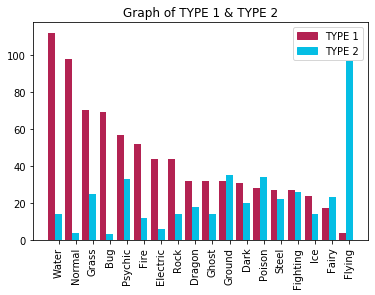

In [12]:
vals1 = [df_st['TYPE 1'].value_counts()[key] for key in df_st['TYPE 1'].value_counts().index]
vals2 = [df_st['TYPE 2'].value_counts()[key] for key in df_st['TYPE 1'].value_counts().index]
inds = np.arange(len(df_st['TYPE 1'].value_counts().index))
width = .4
color1 = np.random.rand(3)
color2 = np.random.rand(3)
handles = [patches.Patch(color=color1, label='TYPE 1'), patches.Patch(color=color2, label='TYPE 2')]
plt.bar(inds, vals1, width, color=color1)
plt.bar(inds+width, vals2, width, color=color2)
plt.gca().set_xticklabels(df_st['TYPE 1'].value_counts().index)
plt.gca().set_xticks(inds+width)
plt.xticks(rotation=90)
plt.legend(handles=handles)
plt.title('Graph of TYPE 1 & TYPE 2')
plt.savefig('Graph of TYPE 1 & TYPE 2.png', bbox_inches = "tight")


When we look it closely, we could see there are different in total pokemon who has `TYPE 1` and `TYPE 2`. It because all pokemon have `TYPE 1` but not all of them have `TYPE 2`, it usually to increase the complexity of the game.

If we want to look total pokemon who have certain combination `TYPE 1` and `TYPE 2`, it could be from this chart :

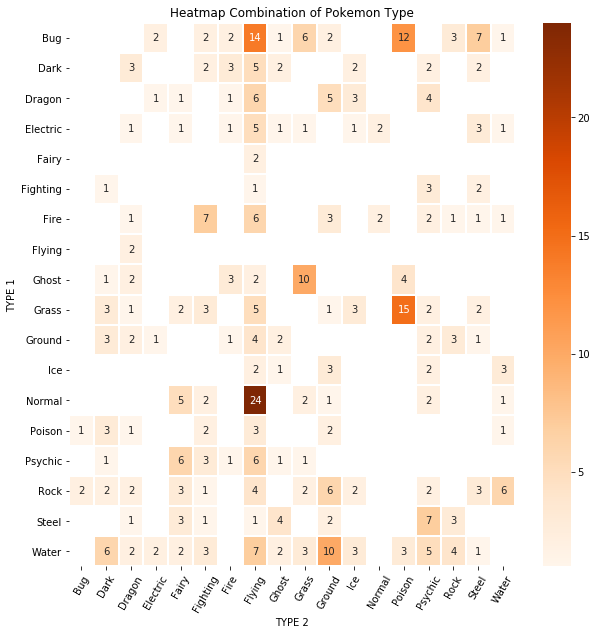

In [15]:
plt.subplots(figsize=(10, 10))

sns.heatmap(
    df_st[df_st['TYPE 2']!='None'].groupby(['TYPE 1', 'TYPE 2']).size().unstack(),
    linewidths=1,
    annot=True,
    cmap="Oranges"
)

plt.xticks(rotation=60)
plt.title('Heatmap Combination of Pokemon Type')
plt.savefig('Heatmap Combination of Pokemon Type', bbox_inches = "tight")
plt.show()

As you can see above, the most common type combination is **Normal-Flying** with 24 pokemons and follow by **Grass-Poison** with 15 pokemons. 

All white box on heatmap means there aren't any combination of those type **or** has the reverse order of type combinations .

## LEGENDARY

`LEGENDARY` pokemon was the icon of the game, usually one game has atleast 1 `LEGENDARY` pokemon. They usually have higher stats then other pokemon so player would be interested finding it. That is why, it's good to find out about them and answering second question.

> How is the distribution of `LEGENDARY` pokemon?

to answer that, we should make another metric where we cut out all pokemon that not `LEGENDARY`.
We could this dataset as `df_legen`

In [16]:
df_legen = df_st[df_st['LEGENDARY']==True]
df_legen

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...
Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
Mega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


As we can see from the data above, there are 65 pokemons that called as `LEGENDARY`. To make sure there are stronger than other pokemon, we could comparing `mean value` of `TOTAL` column from those `LEGENDARY` pokemon and other pokemon.

In [17]:
# Mean value of TOTAL attribute from LEGENDARY pokemon

df_legen['TOTAL'].mean()

637.3846153846154

In [20]:
# Mean value of TOTAL attribute from other pokemon

df_st[df_st['LEGENDARY']==False]['TOTAL'].mean()

417.21360544217686

As we could see, `LEGENDARY` pokemon have 200 more `TOTAL` attribute points then the rest.

If we want to find out distribution of `LEGENDARY` pokemon type, we could see something similar with those graph we have been done in **DISTRIBUTION OF POKEMON TYPE**.

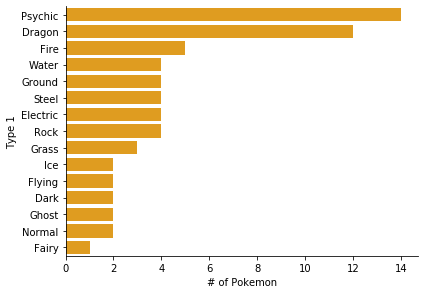

In [28]:
sns.catplot(
    y='TYPE 1',
    data=df_legen,
    kind='count',
    order=df_legen['TYPE 1'].value_counts().index,
    height=4,
    aspect=1.5,
    color='orange'
).set_axis_labels('# of Pokemon', 'Type 1')

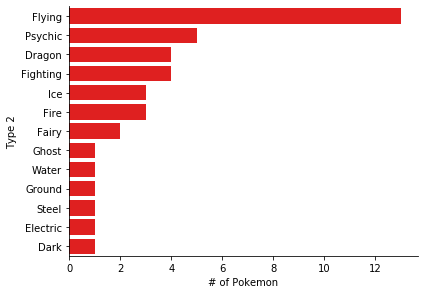

In [29]:
sns.catplot(
    y='TYPE 2',
    data=df_legen,
    kind='count',
    order=df_legen['TYPE 2'].value_counts().index,
    height=4,
    aspect=1.5,
    color='red'
).set_axis_labels('# of Pokemon', 'Type 2');


From the graph above, there are different conclusion between `LEGENDARY` pokemon and other.

> - The **most common** `TYPE 1` of `LEGENDARY` pokemon was psychic type
> - The **least common** `TYPE 1` of `LEGENDARY` pokemon was fairy type
> - However, Flying still the **most common** of `TYPE 2` pokemon but Dark was the **least common** of `TYPE 2`

This is the heatmap combination type of `LEGENDARY` pokemon :

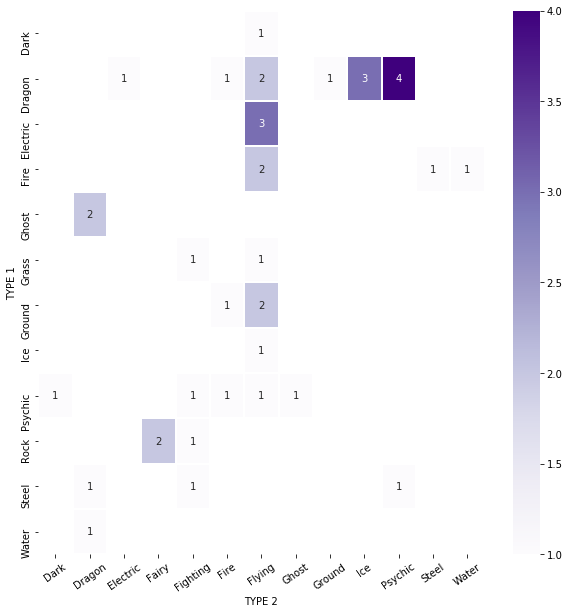

In [24]:
plt.subplots(figsize=(10, 10))

sns.heatmap(
    df_legen[df_legen['TYPE 2']!='None'].groupby(['TYPE 1', 'TYPE 2']).size().unstack(),
    linewidths=1,
    annot=True,
    cmap="Purples"
)

plt.xticks(rotation=35)
plt.show()

From the heatmap above, we could see **Dragon-Psychic** was the most common combination with 4 pokemons, followed by **Dragon-Ice** and **Electric-Flying** in second place with 3 pokemons.

## Attribute Comparison

This part of the notebook will be filled with attribute analysis from different types of pokemon, `TYPE 1` and `TYPE 2` included. There are 7 attributes that could be analyzed, but I choose 2 of them. Those attribute are :
- `ATTACK`
- `DEFENSE`

The reason I choose those 3 attributes is because it is the most common attribute to be found at any rpg game. From beginner level until expert could understand that `ATTACK` means how good your character is at dealing damage and `DEFENSE` means how good your character is at taking damage.

Usually, when doing digital analyzing people will use dataframe correlation as a decision factor why you choose those columns, but in this case, there is no good correlation in this dataset, so I choose based on experience. 


### ATTACK

This chart is a visualization of the `ATTACK` attribute different for each `TYPE 1` pokemon. The `ATTACK` point is based on the mean value of all `ATTACK` attributes for pokemon with that `TYPE 1`.

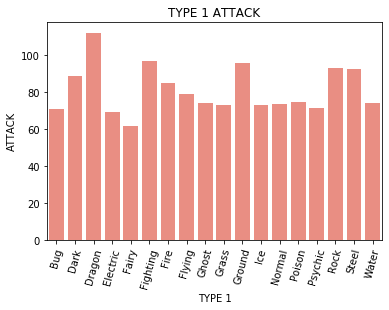

In [30]:
group_type = df_st[['TYPE 1','ATTACK']]
group_type = group_type.groupby(['TYPE 1']).mean()
type(group_type)

chart = sns.barplot(x = group_type.index,
                    y = group_type['ATTACK'],
                    data = group_type,
                   color = 'salmon')

chart.set_title('TYPE 1 ATTACK')

chart.set_xticklabels(chart.get_xticklabels(), 
                      rotation=75,)
fig = chart.get_figure()
fig.savefig("TYPE 1 ATTACK.png", bbox_inches = "tight")

In chart above we could conclude that **Dragon** type is the `TYPE 1` pokemon that has **highest mean value** of `ATTACK` point, however **Fairy** type is the `TYPE 1` pokemon that has **lowest mean value** of `ATTACK` point.

If your strategy is having pokemon with great `ATTACK` power, then having a lot of **Dragon** type pokemon was the most suitable option.

This chart is a visualization of the `ATTACK` attribute different for each `TYPE 2` pokemon. The `ATTACK` point is based on the mean value of all `ATTACK` attributes for pokemon with that `TYPE 2`.

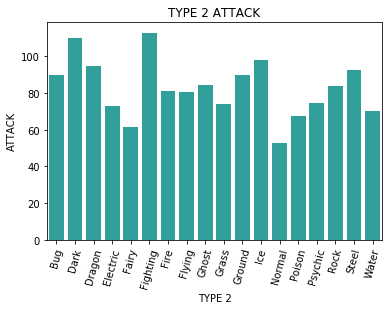

In [33]:
group_type = df_st[['TYPE 2','ATTACK']]
group_type = group_type.groupby(['TYPE 2']).mean()
type(group_type)

chart = sns.barplot(x = group_type.index,
                    y = group_type['ATTACK'],
                    data = group_type,
                   color = 'lightseagreen')

chart.set_title('TYPE 2 ATTACK')

chart.set_xticklabels(chart.get_xticklabels(), 
                      rotation=75,)
fig = chart.get_figure()
fig.savefig("TYPE 2 ATTACK.png", bbox_inches = "tight")

In chart above we could conclude that **Fighting** type is the `TYPE 1` pokemon that has **highest mean value** of `ATTACK` point follow up with **Dark** type that has sligthly lower mean value, however **Normal** type is the `TYPE 1` pokemon that has **lowest mean value** of `ATTACK` point.

`TYPE 2` usually use as enhancer of the `TYPE 1 ` pokemon, it means that if you want to enhance your `ATTACK` but still using certain `TYPE 1`, you could find a pokemon that has `TYPE 2` that has high mean value such as **Figting** type or **Dark** type.

### DEFENSE

This chart is a visualization of the `DEFENSE` attribute different for each `TYPE 1` pokemon. The `DEFENSE` point is based on the mean value of all `DEFENSE` attributes for pokemon with that `TYPE 1`.

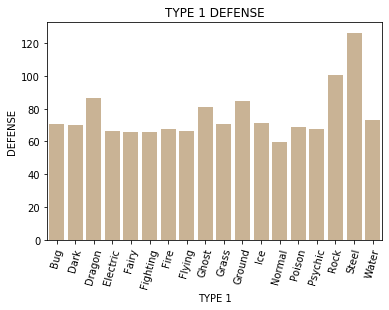

In [31]:
group_type = df_st[['TYPE 1','DEFENSE']]
group_type = group_type.groupby(['TYPE 1']).mean()

chart = sns.barplot(x = group_type.index,
                    y = group_type['DEFENSE'],
                    data = group_type,
                   color = 'tan')

chart.set_title('TYPE 1 DEFENSE')

chart.set_xticklabels(chart.get_xticklabels(), 
                      rotation=75,)
fig = chart.get_figure()
fig.savefig("TYPE 1 DEFENSE.png", bbox_inches = "tight")

In chart above we could conclude that **Steel** type is the `TYPE 1` pokemon that has **highest mean value** of `DEFENSE` point and **Normal** type is the `TYPE 1` pokemon that has **lowest mean value** of `DEFENSE` point.

If your strategy is having pokemon with great `DEFENSE` power, then having a lot of **Steel** type pokemon was the most suitable option.

This chart is a visualization of the `DEFENSE` attribute different for each `TYPE 2` pokemon. The `DEFENSE` point is based on the mean value of all `DEFENSE` attributes for pokemon with that `TYPE 2`.

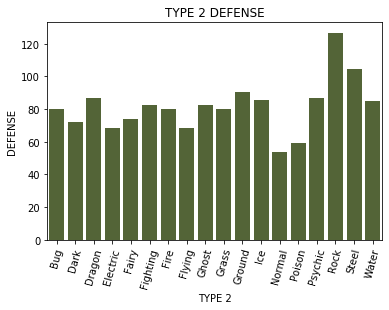

In [34]:
group_type = df_st[['TYPE 2','DEFENSE']]
group_type = group_type.groupby(['TYPE 2']).mean()

chart = sns.barplot(x = group_type.index,
                    y = group_type['DEFENSE'],
                    data = group_type,
                   color = 'darkolivegreen')

chart.set_title('TYPE 2 DEFENSE')

chart.set_xticklabels(chart.get_xticklabels(), 
                      rotation=75,)
fig = chart.get_figure()
fig.savefig("TYPE 2 DEFENSE.png", bbox_inches = "tight")

In chart above we could conclude that **Rock** type is the `TYPE 2` pokemon that has **highest mean value** of `DEFENSE` point and **Normal** type is the `TYPE 2` pokemon that has **lowest mean value** of `DEFENSE` point.

This mean if you want to enhance you `DEFENSE` but still use certain `TYPE 1` pokemon, you should consider choose pokemon that has **Rock** as `TYPE 2`.

### That's all of this notebook. Thank you for Alberto Barradas for this great dataset.
Thank you for reading this notebook. I hope you like it!